## Multilevel Perceptron (MLP)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train_imdb, y_train_imdb), (x_test_imdb, y_test_imdb) = tf.keras.datasets.imdb.load_data()

word_index = tf.keras.datasets.imdb.get_word_index()
index2word = dict((i + 3, word) for (word, i) in word_index.items())
index2word[0] = '[pad]'
index2word[1] = '[bos]'
index2word[2] = '[oov]'
x_train_imdb = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train_imdb])
x_test_imdb = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test_imdb])

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# min-df --> when building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
binary_vectorizer = CountVectorizer(binary=True, min_df=100)
x_train_imdb_binary = binary_vectorizer.fit_transform(x_train_imdb)
x_test_imdb_binary = binary_vectorizer.transform(x_test_imdb)
print(
    'Vocabulary size:', len(binary_vectorizer.vocabulary_)
)

Vocabulary size: 3834


In [4]:
x_train_imdb_binary = x_train_imdb_binary.toarray()
x_test_imdb_binary = x_test_imdb_binary.toarray()

In [5]:
from tensorflow.keras.layers import Layer

class CenteredEmbeddingLayer(Layer):
    def __init__(self, input_dim, output_dim, **kwargs):
        super(CenteredEmbeddingLayer, self).__init__(**kwargs)
        self.embedding = tf.keras.layers.Embedding(input_dim, output_dim)

    def call(self, inputs):
        # Υπολογισμός του μέσου όρου για κάθε παράδειγμα
        mean = tf.reduce_mean(inputs, axis=1, keepdims=True)
        
        # Υπολογισμός της απόκλισης από το μέσο όρο
        centered_inputs = inputs - mean
        
        # Εφαρμογή της ενθέσεως λέξεων μετά τον υπολογισμό της απόκλισης
        embedded_inputs = self.embedding(centered_inputs)
        
        return embedded_inputs

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [23]:
model = Sequential()
model.add(Embedding(input_dim=3834, output_dim=5,input_length=3834))
model.add(Dense(32, activation='relu', input_shape=(3834,)))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#y_train_imdb = np.expand_dims(y_train_imdb, axis=1)
#y_test_imdb = np.expand_dims(y_train_imdb, axis=1)

history = model.fit(x_train_imdb_binary, y_train_imdb, epochs=4, batch_size=32)


Epoch 1/4
782/782 [==============================] - 56s 71ms/step - loss: 0.3756 - accuracy: 0.8243
Epoch 2/4
782/782 [==============================] - 54s 69ms/step - loss: 0.2516 - accuracy: 0.8992
Epoch 3/4
782/782 [==============================] - 53s 68ms/step - loss: 0.2327 - accuracy: 0.9089
Epoch 4/4
782/782 [==============================] - 53s 68ms/step - loss: 0.2221 - accuracy: 0.9114


In [24]:

#y_test_imdb = np.squeeze(y_test_imdb, axis=-1)
results = model.evaluate(x_test_imdb_binary, y_test_imdb)
y = model.predict(x_test_imdb_binary)
y = (y > 0.5).astype(int)

print(classification_report(y_test_imdb, y))

782/782 [==============================] - 14s 17ms/step
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     12500
           1       0.88      0.85      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [30]:
dat = classification_data(model, x_train_imdb_binary, y_train_imdb, x_test_imdb_binary, y_test_imdb, 5, model='Sequential')

782/782 [==============================] - 14s 18ms/step


,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test
5000,0.98,0.86,0.98,0.86,0.98,0.86,0.98,0.86
10000,0.97,0.86,0.96,0.85,0.98,0.87,0.97,0.86
15000,0.95,0.86,0.94,0.84,0.97,0.88,0.95,0.86
20000,0.95,0.86,0.93,0.85,0.96,0.87,0.95,0.86
25000,0.94,0.86,0.94,0.86,0.94,0.86,0.94,0.86


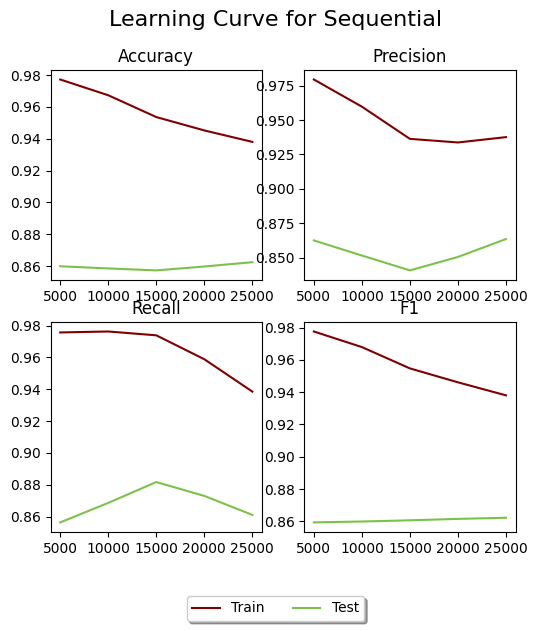

In [31]:
dat_table = classification_table(dat, x_train_imdb_binary)
ipd.display(dat_table)

r = classification_plots(dat)

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3834, 5)           19170     
                                                                 
 dense (Dense)               (None, 3834, 32)          192       
                                                                 
 dropout (Dropout)           (None, 3834, 32)          0         
                                                                 
 dense_1 (Dense)             (None, 3834, 32)          1056      
                                                                 
 flatten (Flatten)           (None, 122688)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 122689    
                                                                 
Total params: 143107 (559.01 KB)
Trainable params: 14310

C:\Users\eleni\AppData\Local\Temp\ipykernel_23432\4180266461.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_coords, y_coords, c=colors, cmap='bwr')


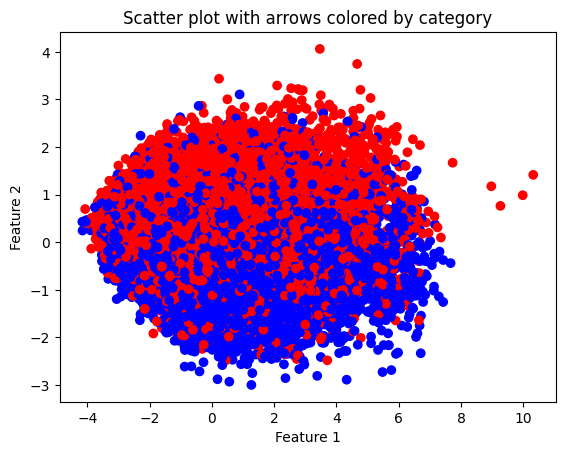

NameError: name 'y_pred_mnist' is not defined

In [9]:

from sklearn.decomposition import PCA

colors = ['blue' if label == 0 else 'red' for label in y_test_imdb]
pca = PCA(n_components=2)
x_test_reduced = pca.fit_transform(x_test_imdb_binary)

x_coords = x_test_reduced[:, 0]
y_coords = x_test_reduced[:, 1]

# Σχεδίαση των βούλων με χρωματισμό ανά κατηγορία
plt.scatter(x_coords, y_coords, c=colors, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot with arrows colored by category')
plt.show()


x_test_reduced1 = pca.fit_transform(x_train_imdb_binary)
x_coords = x_test_reduced[:, 0]
y_coords = x_test_reduced[:, 1]

colors = ['blue' if label == 0 else 'red' for label in y_pred_mnist]
plt.scatter(x_coords, y_coords, c=colors, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot with arrows colored by category')
plt.show()


In [57]:
inp = tf.keras.layers.Input(shape=(3834), name='inputs')
x = Embedding(input_dim=3834, output_dim=5,input_length=3834)(inp)
x = tf.keras.layers.Flatten(name='flatten_inputs')(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='hidden_1')(x)
x = tf.keras.layers.Dropout(rate=0.3, name='Dropout')(x)
x = tf.keras.layers.Dense(units=256, activation='relu', name='hidden_2')(x)
x = tf.keras.layers.Dropout(rate=0.4, name='Dropout2')(x)
x = tf.keras.layers.Dense(units=1, activation='sigmoid',
                            name='classifier')(x)
m = tf.keras.models.Model(inputs=inp, outputs=x, name='Functional')

In [58]:
m.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())
y_trainn = tf.keras.utils.to_categorical(y_train_imdb, num_classes=2,
                                               dtype="int32")
y_testt= tf.keras.utils.to_categorical(y_test_imdb, num_classes=2,
                                              dtype="int32")
his = m.fit(x_train_imdb_binary, y_train_imdb, epochs=4, batch_size=32, validation_split=0.2)
y_trainn[0]

Epoch 1/4
625/625 [==============================] - 60s 95ms/step - loss: 0.4000 - accuracy: 0.8055 - val_loss: 0.2904 - val_accuracy: 0.8758
Epoch 2/4
625/625 [==============================] - 60s 95ms/step - loss: 0.2423 - accuracy: 0.9004 - val_loss: 0.2963 - val_accuracy: 0.8768
Epoch 3/4
625/625 [==============================] - 60s 95ms/step - loss: 0.1830 - accuracy: 0.9262 - val_loss: 0.3464 - val_accuracy: 0.8694
Epoch 4/4
625/625 [==============================] - 60s 96ms/step - loss: 0.1142 - accuracy: 0.9577 - val_loss: 0.4581 - val_accuracy: 0.8656


array([0, 1])

In [41]:
print(m.evaluate(x_test_imdb_binary, y_testt))

782/782 [==============================] - 2s 3ms/step - loss: 0.5696 - accuracy: 0.8607
[0.5696231126785278, 0.8606799840927124]


In [47]:
from sklearn.metrics import classification_report

y_pred_mnist = m.predict(x_test_imdb_binary)
print(y_pred_mnist[0])
y_pred_mnist = [0 if x<0.5 else 1 for x in y_pred_mnist]
print(y_pred_mnist[0])
#y_pred_mnist = tf.keras.utils.to_categorical(y_pred_mnist,num_classes=2, dtype="int32")
print(y_pred_mnist[0])
# Print evaluation report

print(classification_report(y_test_imdb, y_pred_mnist))

782/782 [==============================] - 2s 3ms/step
[0.09034716]
0
0
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [62]:
data = classification_data(m, x_train_imdb_binary, y_train_imdb, x_test_imdb_binary, y_test_imdb, 5, model='Functional')


782/782 [==============================] - 5s 6ms/step


,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test
5000,1.00,0.86,1.00,0.88,1.00,0.85,1.00,0.86
10000,1.00,0.86,1.00,0.85,1.00,0.87,1.00,0.86
15000,1.00,0.86,1.00,0.86,1.00,0.87,1.00,0.86
20000,1.00,0.86,1.00,0.84,1.00,0.89,1.00,0.86
25000,0.99,0.87,0.99,0.88,0.99,0.85,0.99,0.86


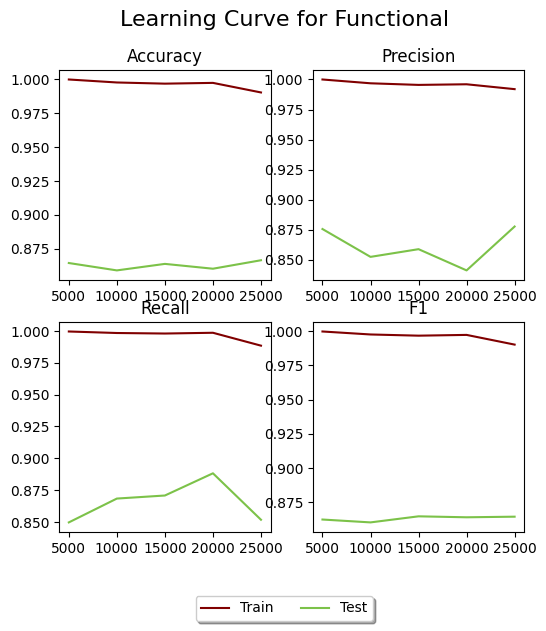

In [63]:
data_table = classification_table(data, x_train_imdb_binary)
ipd.display(data_table)

x = classification_plots(data)

,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test
5000,0.13,0.02,0.12,0.03,0.13,0.02,0.12,0.02
10000,0.13,0.01,0.14,0.00,0.13,0.02,0.13,0.01
15000,0.14,0.01,0.14,0.01,0.13,0.03,0.14,0.01
20000,0.14,0.01,0.14,0.01,0.14,0.05,0.14,0.01
25000,0.13,0.02,0.14,0.03,0.12,0.00,0.13,0.01


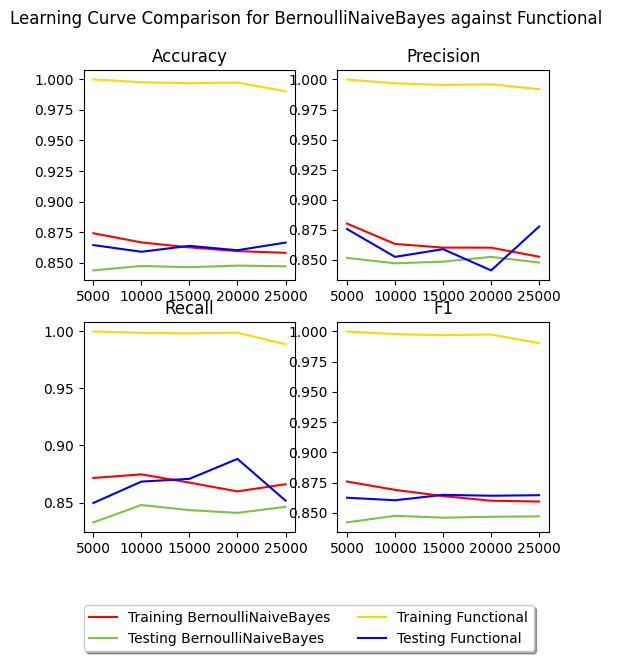

In [64]:
from visualizations import *


nb_data = {'estimator': 'BernoulliNaiveBayes', 'split_size': 5000, 'splits': 5, 'test_predictions': np.array([0, 1, 1, ..., 0, 0, 1]), 'train_accuracy': [0.8742, 0.8667, 0.8626666666666667, 0.8596, 0.8582], 'test_accuracy': [0.84384, 0.84748, 0.84644, 0.84776, 0.8472], 'train_precision': [0.8802062673542245, 0.86328125, 0.8602079768329604, 0.8601775206941259, 0.8526423564621565], 'test_precision': [0.8516609392898052, 0.8471744864519223, 0.8485311871227365, 0.8524975673045735, 0.8478121493829139], 'train_recall': [0.8715632364493323, 0.874727884425094, 0.8675162617814948, 0.8598345130096701, 0.86608], 'test_recall': [0.83272, 0.84792, 0.84344, 0.84104, 0.84632], 'train_f1': [0.8758634300374976, 0.8689668730954486, 0.8638466622604098, 0.8600059826503141, 0.8593086478549034], 'test_f1': [0.8420839737885284, 0.8475470792851144, 0.8459779338014041, 0.8467300257731958, 0.8470654175674593], 'final_cm': np.array([[10601,  1899],[ 1921, 10579]], dtype=np.int64)}
nb_data_table = classification_table(nb_data, x_test_imdb_binary)
ipd.display(abs(nb_data_table - data_table))

x=classification_plots_compare(nb_data, data)


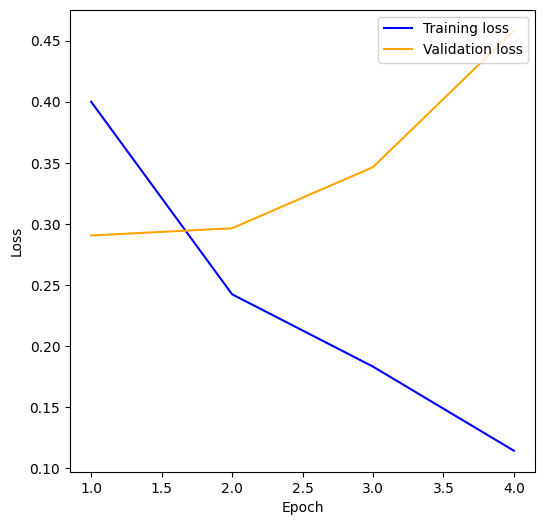

In [66]:
x = loss_plot(his, 'loss')

In [65]:
print(m.summary())

Model: "Functional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 3834)]            0         
                                                                 
 embedding_3 (Embedding)     (None, 3834, 5)           19170     
                                                                 
 flatten_inputs (Flatten)    (None, 19170)             0         
                                                                 
 hidden_1 (Dense)            (None, 512)               9815552   
                                                                 
 Dropout (Dropout)           (None, 512)               0         
                                                                 
 hidden_2 (Dense)            (None, 256)               131328    
                                                                 
 Dropout2 (Dropout)          (None, 256)               0

In [39]:
y_pred_mnist = m.predict(x_test_imdb_binary)
print(y_pred_mnist)

782/782 [==============================] - 2s 3ms/step
[[9.6592182e-01 3.4078166e-02]
 [1.1749049e-05 9.9998820e-01]
 [1.3050065e-02 9.8694998e-01]
 ...
 [9.8516846e-01 1.4831488e-02]
 [7.1965587e-01 2.8034419e-01]
 [1.8281776e-01 8.1718224e-01]]
